# Data Collection


In [177]:
# Import Modules
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [178]:
# Data reading 
data=pd.read_csv("Internship_daljr.csv")

In [179]:
# Train test split
data_train,data_test = train_test_split(data, test_size=0.2, random_state=42)

In [180]:
data=pd.DataFrame(data_train)

In [181]:
# Display dataframe
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
29,female,group D,master's degree,standard,none,62,70,75
535,female,group C,bachelor's degree,free/reduced,completed,66,83,83
695,female,group D,some college,free/reduced,none,79,89,86
557,male,group C,master's degree,free/reduced,none,61,67,66
836,male,group E,high school,standard,none,73,64,57


# Data Analysis

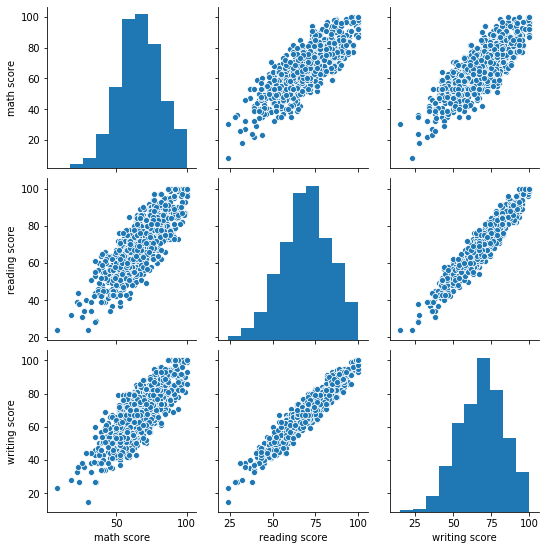

In [182]:
# Analysis of all possible numerical plot.
sb.pairplot(data)

In [183]:
# Information of data.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 29 to 102
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       800 non-null    object
 1   race/ethnicity               800 non-null    object
 2   parental level of education  800 non-null    object
 3   lunch                        800 non-null    object
 4   test preparation course      800 non-null    object
 5   math score                   800 non-null    int64 
 6   reading score                800 non-null    int64 
 7   writing score                800 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 96.2+ KB


In [184]:
# Statastical details.
data.describe()

,math score,reading score,writing score
count,800.000000,800.000000,800.000000
mean,66.496250,69.555000,68.456250
std,15.024302,14.461532,15.085342
min,8.000000,24.000000,15.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [185]:
# Analysis of categorical feature.
data['parental level of education'].value_counts()

some college          182
associate's degree    179
high school           159
some high school      137
bachelor's degree      96
master's degree        47
Name: parental level of education, dtype: int64

In [186]:
# Analysis of categorical feature.
data['lunch'].value_counts()

standard        523
free/reduced    277
Name: lunch, dtype: int64

In [187]:
data['test preparation course'].value_counts()

none         521
completed    279
Name: test preparation course, dtype: int64

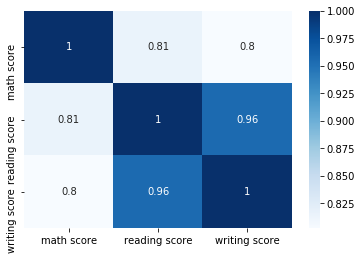

In [188]:
# Analysis of categorical feature.
sb.heatmap(data.corr(),cmap='Blues',annot=True)

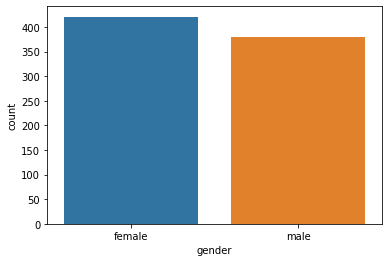

In [189]:
# Analysis of categorical feature.
sb.countplot(x='gender',data=data)

In [190]:
# Analysis of categorical feature.
data['gender'].value_counts()

female    421
male      379
Name: gender, dtype: int64

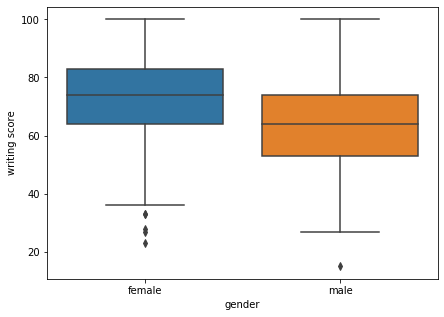

In [191]:
# Analyse whether gender affect target variable.
plt.figure(figsize=(7,5))
sb.boxplot(x='gender',y='writing score',data=data)

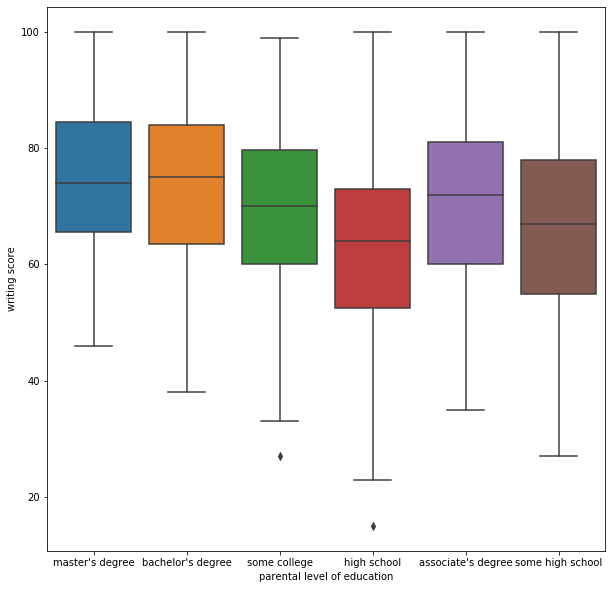

In [192]:
# Analyse whether parent education level affect target variable.
plt.figure(figsize=(10,10))
sb.boxplot(x='parental level of education',y='writing score',data=data)

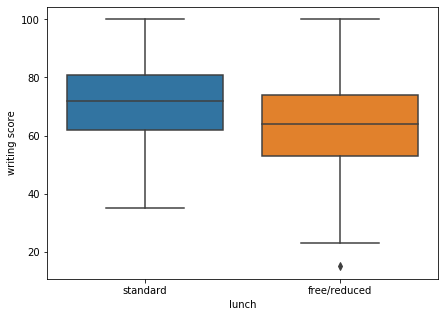

In [193]:
# Analyse whether school standard affect target variable.
plt.figure(figsize=(7,5))
sb.boxplot(x='lunch',y='writing score',data=data)

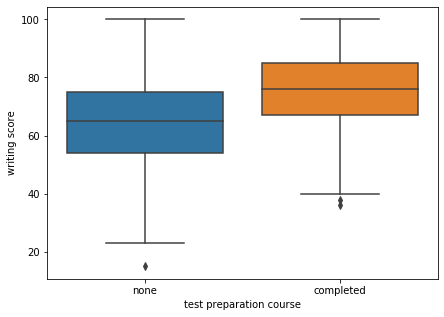

In [194]:
# Analyse whether test peparation affect target variable.
plt.figure(figsize=(7,5))
sb.boxplot(x='test preparation course',y='writing score',data=data)

# Data Wrangling

In [195]:
# Display dataframe
data=data.drop(columns=['race/ethnicity'])
data.head(10)

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
29,female,master's degree,standard,none,62,70,75
535,female,bachelor's degree,free/reduced,completed,66,83,83
695,female,some college,free/reduced,none,79,89,86
557,male,master's degree,free/reduced,none,61,67,66
836,male,high school,standard,none,73,64,57
596,male,high school,free/reduced,none,30,24,15
165,female,bachelor's degree,standard,completed,96,100,100
918,female,associate's degree,standard,completed,57,77,80
495,male,high school,standard,completed,68,64,66
824,female,some high school,free/reduced,none,48,58,52


In [196]:
# Data Transformation Pipeline.
cat_gen=['gender']
cat_parent_edu=['parental level of education']
cat_lunch=['lunch']
cat_prep=['test preparation course']

pipeline_attribute=ColumnTransformer([
    ("cat_gender",OneHotEncoder(),cat_gen),
    ("cat_parent",OrdinalEncoder(),cat_parent_edu),
    ("cat_lun",OneHotEncoder(),cat_lunch),
    ("cat_pre",OneHotEncoder(),cat_prep)],
    remainder='passthrough')

data_new=pipeline_attribute.fit_transform(data)

In [197]:
# Modified Data Frame .
labels=['female','male','parental level of education','free/reduced','standard','completed','none','math score','reading score','writing score']
data_new_df=pd.DataFrame(data_new,columns=labels)
data_new_df.head(10)

,female,male,parental level of education,free/reduced,standard,completed,none,math score,reading score,writing score
0,1.0,0.0,3.0,0.0,1.0,0.0,1.0,62.0,70.0,75.0
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,66.0,83.0,83.0
2,1.0,0.0,4.0,1.0,0.0,0.0,1.0,79.0,89.0,86.0
3,0.0,1.0,3.0,1.0,0.0,0.0,1.0,61.0,67.0,66.0
4,0.0,1.0,2.0,0.0,1.0,0.0,1.0,73.0,64.0,57.0
5,0.0,1.0,2.0,1.0,0.0,0.0,1.0,30.0,24.0,15.0
6,1.0,0.0,1.0,0.0,1.0,1.0,0.0,96.0,100.0,100.0
7,1.0,0.0,0.0,0.0,1.0,1.0,0.0,57.0,77.0,80.0
8,0.0,1.0,2.0,0.0,1.0,1.0,0.0,68.0,64.0,66.0
9,1.0,0.0,5.0,1.0,0.0,0.0,1.0,48.0,58.0,52.0


In [198]:
# Analysing correlation.
corr_matrix=data_new_df.corr()
corr_matrix['writing score'].sort_values(ascending=False)

writing score                  1.000000
reading score                  0.955853
math score                     0.802409
completed                      0.323897
female                         0.313003
standard                       0.260776
parental level of education   -0.091597
free/reduced                  -0.260776
male                          -0.313003
none                          -0.323897
Name: writing score, dtype: float64

In [199]:
# Adding New Feature.
data_new_df['Average']=(data_new_df['completed']+data_new_df['none']+data_new_df['math score']+data_new_df['reading score'])/3

In [200]:
# Display data frame.
data_new_df.head(10)

,female,male,parental level of education,free/reduced,standard,completed,none,math score,reading score,writing score,Average
0,1.0,0.0,3.0,0.0,1.0,0.0,1.0,62.0,70.0,75.0,44.333333
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,66.0,83.0,83.0,50.000000
2,1.0,0.0,4.0,1.0,0.0,0.0,1.0,79.0,89.0,86.0,56.333333
3,0.0,1.0,3.0,1.0,0.0,0.0,1.0,61.0,67.0,66.0,43.000000
4,0.0,1.0,2.0,0.0,1.0,0.0,1.0,73.0,64.0,57.0,46.000000
5,0.0,1.0,2.0,1.0,0.0,0.0,1.0,30.0,24.0,15.0,18.333333
6,1.0,0.0,1.0,0.0,1.0,1.0,0.0,96.0,100.0,100.0,65.666667
7,1.0,0.0,0.0,0.0,1.0,1.0,0.0,57.0,77.0,80.0,45.000000
8,0.0,1.0,2.0,0.0,1.0,1.0,0.0,68.0,64.0,66.0,44.333333
9,1.0,0.0,5.0,1.0,0.0,0.0,1.0,48.0,58.0,52.0,35.666667


In [201]:
# Analysing New correlation.
corr_matrix=data_new_df.corr()
corr_matrix['writing score'].sort_values(ascending=False)

writing score                  1.000000
reading score                  0.955853
Average                        0.921340
math score                     0.802409
completed                      0.323897
female                         0.313003
standard                       0.260776
parental level of education   -0.091597
free/reduced                  -0.260776
male                          -0.313003
none                          -0.323897
Name: writing score, dtype: float64

# Select And Train Model

In [202]:
# data Frame to 2-d array.
X=data_new_df.drop(columns=['writing score'])
y=data_new_df['writing score']

In [203]:
# Train test split
X_train, X_cross, y_train, y_cross = train_test_split(X, y, test_size=0.2, random_state=42)

In [204]:
# Train the model
lasso_r=Lasso(alpha=0.1,max_iter=3000)
lasso_r.fit(X_train,y_train)
lasso_r.score(X_cross,y_cross)*100

93.93148257747296

In [205]:
# Rmse.
predict=lasso_r.predict(X_cross)
mse=mean_squared_error(y_cross,predict)
rmse=np.sqrt(mse)
print(mse,rmse,sep='\n')

14.597970372824298
3.820729036823247


In [206]:
# Possible results
score=cross_val_score(lasso_r,X,y,cv=10)
print('List of possible accuracy:',score)
print('Maximum accuracy that can be achived:',score.max())
print('Minimum accuracy that can be achived:',score.min())
print('Mean of the accuracy:',score.mean())
print('Standard deviation from mean accuracy:',score.std())

List of possible accuracy: [0.94746448 0.96196976 0.92633149 0.94260306 0.93925084 0.93579112
 0.89907658 0.94766684 0.93927279 0.93855482]
Maximum accuracy that can be achived: 0.9619697618446552
Minimum accuracy that can be achived: 0.8990765826531866
Mean of the accuracy: 0.9377981774874821
Standard deviation from mean accuracy: 0.015613816412028367


In [207]:
# Possible results
score=cross_val_score(lasso_r,X,y,scoring="neg_mean_squared_error",cv=10)
rmse_list=np.sqrt(-score)
print(rmse_list)
print("mean:",rmse_list.mean())
print("STD:",rmse_list.std())

[3.89077228 3.21210175 3.9481442  3.55587171 3.58880145 3.65832459
 4.19532975 3.52492137 3.65897033 3.64634263]
mean: 3.6879580057297794
STD: 0.25495210572598564


# Final Testing